In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math
from scipy import signal
from scipy.fftpack import fft
from scipy import ndimage
from scipy import special
%matplotlib inline

Text(0.5, 1.0, 'temporal kernal of gain')

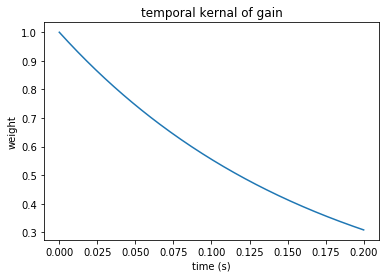

In [2]:
#Adaptation filter
tau_y = 0.17
tau_z = 0.5769
gamma = 0.764
beta_c = -605
dt = 0.001
def Ky(t):
    return t*np.exp(-t/tau_y)/(tau_y**2)
def Kz(t):
    y = gamma*t*np.exp(-t/tau_y)/(tau_y**2)
    z = (1-gamma)*t*np.exp(-t/tau_z)/(tau_z**2)
    return y+z
def exp_decay(t):
    return np.exp(-t/tau_y)
length = 30
temp_Kz = Kz(np.arange(0,0.2+dt,dt))
temp_exp = exp_decay(np.arange(0,0.2+dt,dt))
plt.plot(np.arange(0,0.2+dt,dt),temp_exp)
plt.xlabel('time (s)')
plt.ylabel('weight')
plt.title('temporal kernal of gain')

In [3]:
def K(x,s):
    return(np.exp(-(x/s)**2))/s/np.sqrt(np.pi)

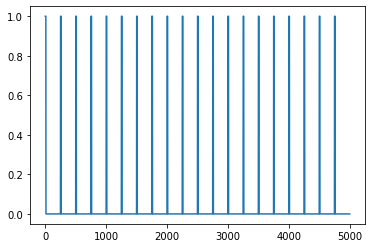

In [4]:
nstep = 5000
frequency = 4#Hz
C = 1
nperiod = int((1/frequency)/dt)
# generation of stimulations
s = np.zeros(nstep)
for i in range(nstep):
    if i % nperiod <10:
        s[i] = C
#s = np.convolve(tp,s,'same')*dt
plt.plot(s)

In [5]:
alpha = 40
beta = 2
gamma = 100
k = 400
w = 40
o = 40
rsp = np.zeros(nstep)#y output
zts = np.zeros(nstep)#horizontal
ganglions = np.zeros(nstep)#ganglion cell
gains = np.zeros(nstep)
y = 0
z = 0
g = 0
for i in range(nstep):
    dyj =(-alpha*y+k*(s[i]-z))*dt
    y = y+dyj
    dzj =(-beta*z+w*y)*dt
    z = z+dzj
    dgj = (-gamma*g+o*y)*dt
    g = g+dgj
    rsp[i] = y
    zts[i] = z
    ganglions[i] = g
    if i >=len(temp_exp):
        V = 1000*np.convolve(ganglions[i-len(temp_exp)+1:i+1],temp_exp,'valid')*dt
        if V<0:
            gain_z = 1
        else:
            gain_z = 1/(1+V**4)
        ganglions[i] = gain_z*ganglions[i]
        gains[i] = gain_z
        
    

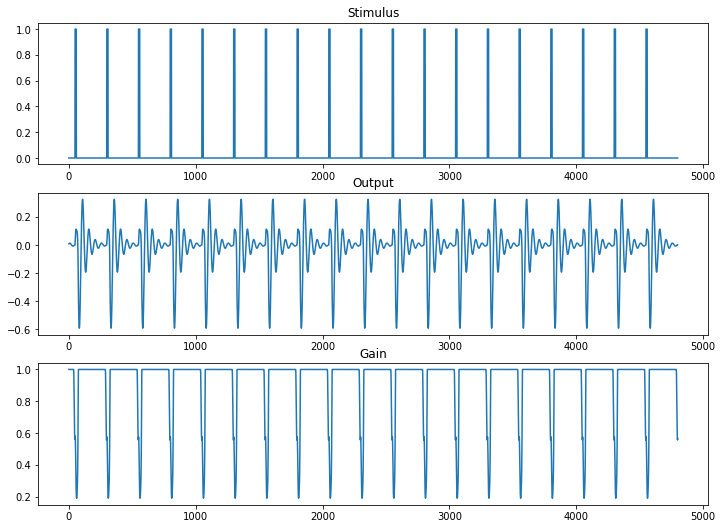

In [6]:
plt.subplot(411)
plt.plot(s[len(temp_exp):])
plt.title('Stimulus')
plt.subplot(412)
plt.plot(ganglions[len(temp_exp):])
plt.title('Output')
plt.subplot(413)
plt.plot(gains[len(temp_exp):])
plt.title('Gain')
#plt.subplot(414)
#plt.plot(V)
#plt.title('V')
plt.gcf().set_size_inches(12,12)

In [7]:
V

array([0.9354615])